# Data Exploration

Hey! During this first step, please, take a look at the data set and just explore it, find the types of each column and try to find interesting things. Don't worry about data cleaning. Just exploration for now.  
You can answer the following questions:
- How many columns there are
- The type of each column
- The different values that a column can take
- Which do you think are the most important columns? If we are looking at the overall score.

Go wild! (Remember, so far, only exploration).


In [138]:
import pandas as pd
import seaborn as sns

In [139]:
# The first thing was to check the data docs at https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42 
df = pd.read_csv('Saber_11__2019-2.csv')
df.head()

C:\Users\jagiraldo\AppData\Local\Temp\ipykernel_16160\2972959786.py:2: DtypeWarning: Columns (76,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Saber_11__2019-2.csv')


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,...,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,...,54.0,67,A1,208,25,50.9421557404314,2.0,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,...,63.0,88,A2,299,83,59.767864431576,3.0,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,...,64.0,89,A2,299,84,50.7642383644749,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,20194,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,...,53.0,67,A1,309,88,45.7791353123516,2.0,3.0,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,20194,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,...,52.0,63,A1,288,78,52.9109464277177,3.0,3.0,PUBLICAR,NO


## Content exploration

In [140]:
print(f"This dataframe has {df.columns.size} columns")

This dataframe has 82 columns


In [141]:
t = df.dtypes # Indentify columns with mixed types or strings
obj = t[t=="object"]
print(obj.index)

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE',
       'ESTU_TIENEETNIA', 'ESTU_PAIS_RESIDE', 'ESTU_ETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_NOMBRE_ESTAB

In [142]:
t = df.dtypes # Identify columns with numerical data types
num = t[t!="object"]
print(num.index)

Index(['PERIODO', 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO',
       'COLE_COD_DANE_SEDE', 'COLE_COD_MCPIO_UBICACION',
       'COLE_COD_DEPTO_UBICACION', 'ESTU_COD_MCPIO_PRESENTACION',
       'ESTU_COD_DEPTO_PRESENTACION', 'PUNT_LECTURA_CRITICA',
       'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS',
       'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
       'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS',
       'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


## Data cleaning

In [143]:
is_na = df.isna().sum(axis=0) # Check which attributes have missing values
is_na = is_na[is_na != 0]
print(is_na.index)

Index(['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CARACTER', 'PUNT_INGLES',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL',
       'ESTU_NSE_ESTABLECIMIENTO'],
      dtype='object')


In [144]:
is_na = is_na.sort_values(ascending=False)
print(is_na[is_na>0].head())

ESTU_DEDICACIONINTERNET          30298
FAMI_COMECEREALFRUTOSLEGUMBRE    22332
FAMI_COMELECHEDERIVADOS          22305
FAMI_TIENESERVICIOTV             22280
FAMI_EDUCACIONMADRE              20959
dtype: int64


In [145]:
df = df.drop(is_na[is_na>1000].index, axis=1) # Drop columns with missing data
a = df.isna().sum(axis=1).sort_values(ascending=False) # Check which rows have missing features
print(a[a>0].size)

1149


In [146]:
df = df.drop(a[a>0].index) # Drop rows
df = df.drop(["ESTU_TIPODOCUMENTO", "ESTU_NACIONALIDAD", "PERIODO", "ESTU_CONSECUTIVO", "ESTU_ESTUDIANTE", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", "COLE_COD_DEPTO_UBICACION", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_COD_DEPTO_PRESENTACION", "ESTU_ESTADOINVESTIGACION"], axis=1)

In [147]:
df["ESTU_FECHANACIMIENTO"] = df["ESTU_FECHANACIMIENTO"].map(lambda x: (x.split(" ")[0]).split("/")[2])
df["ESTU_FECHANACIMIENTO"] = df["ESTU_FECHANACIMIENTO"].astype(int)


In [174]:
df = df[(df["ESTU_FECHANACIMIENTO"]>1900) & (df["ESTU_FECHANACIMIENTO"]<=2010)]

## Exploratory analysis

In [175]:
df["PUNT_GLOBAL"].describe()

count    542933.000000
mean        246.248905
std          51.390756
min           0.000000
25%         207.000000
50%         243.000000
75%         282.000000
max         477.000000
Name: PUNT_GLOBAL, dtype: float64

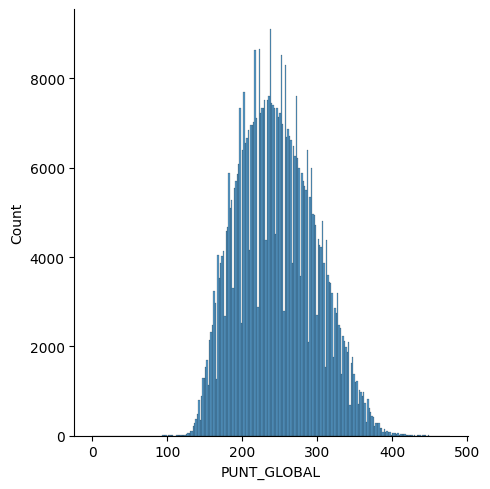

In [176]:
sns.displot(df, x="PUNT_GLOBAL")

In [177]:
g = df.groupby("ESTU_DEPTO_RESIDE")["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:15])

ESTU_DEPTO_RESIDE
BOGOTÁ             266.534449
SANTANDER          264.155274
BOYACA             261.596443
NORTE SANTANDER    255.385619
CUNDINAMARCA       253.200211
QUINDIO            251.956406
RISARALDA          250.395449
HUILA              250.066629
META               247.977686
CASANARE           246.729418
CALDAS             246.244297
NARIÑO             244.358017
VALLE              242.674051
ANTIOQUIA          241.958518
ATLANTICO          241.646936
Name: PUNT_GLOBAL, dtype: float64


In [178]:
g = df.groupby(["ESTU_DEPTO_RESIDE","ESTU_MCPIO_RESIDE"])["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:15])

ESTU_DEPTO_RESIDE  ESTU_MCPIO_RESIDE    
SANTANDER          CALIFORNIA               288.875000
                   PALMAR                   288.300000
                   SAN JOSÉ DE MIRANDA      287.083333
BOYACA             PAIPA                    285.159624
SANTANDER          JORDÁN                   284.750000
                   CONTRATACIÓN             284.627451
NARIÑO             GUALMATÁN                281.661972
BOYACA             SANTA ROSA DE VITERBO    281.438017
NORTE SANTANDER    PAMPLONA                 281.019449
BOYACA             DUITAMA                  280.782854
SANTANDER          BUCARAMANGA              279.798642
ANTIOQUIA          ENVIGADO                 278.757282
BOYACA             IZA                      278.363636
SANTANDER          SAN MIGUEL               277.472222
BOYACA             SOGAMOSO                 277.221350
Name: PUNT_GLOBAL, dtype: float64


In [196]:
g = df.groupby(["ESTU_FECHANACIMIENTO"])["PUNT_GLOBAL"].mean().sort_values(ascending=False)
print(g[:10])

ESTU_FECHANACIMIENTO
2004    265.352462
2003    264.301074
2002    256.569053
2005    248.978261
2006    248.177778
2010    246.441441
2007    244.586207
2009    242.763158
2001    235.200959
2000    223.793527
Name: PUNT_GLOBAL, dtype: float64


In [194]:
g = df.groupby(["ESTU_DEDICACIONLECTURADIARIA"])["PUNT_GLOBAL"].mean().sort_values()
print(g)

ESTU_DEDICACIONLECTURADIARIA
-                             222.053854
No leo por entretenimiento    237.293268
30 minutos o menos            241.617843
Entre 30 y 60 minutos         256.453540
Entre 1 y 2 horas             258.074556
Más de 2 horas                266.296669
Name: PUNT_GLOBAL, dtype: float64


### Reading comprehension

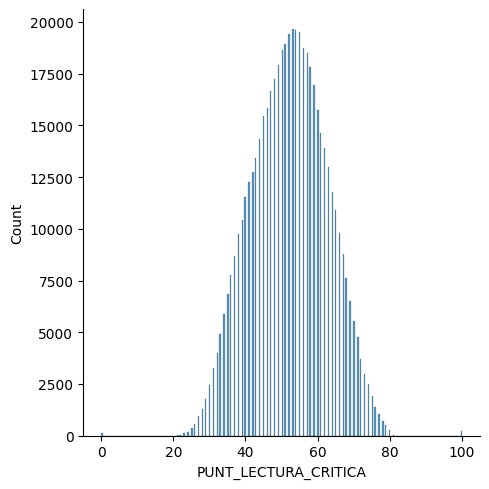

In [179]:
sns.displot(df, x="PUNT_LECTURA_CRITICA")

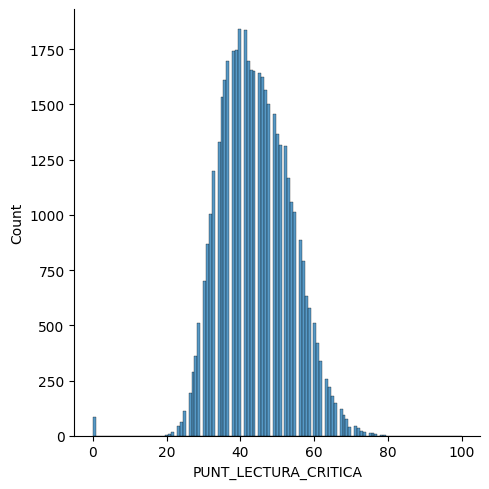

In [181]:
sns.displot(df, x=df["PUNT_LECTURA_CRITICA"].where(df["ESTU_FECHANACIMIENTO"]<2000)) # Exploration by age

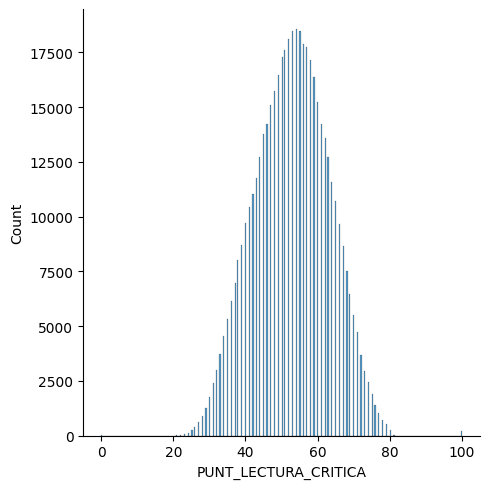

In [182]:
sns.displot(df, x=df["PUNT_LECTURA_CRITICA"].where(df["ESTU_FECHANACIMIENTO"]>=2000)) # Exploration by age

In [183]:
g = df.groupby(["PUNT_LECTURA_CRITICA", "ESTU_DEDICACIONLECTURADIARIA"])["PUNT_GLOBAL"].agg(["mean", "size"]).sort_values(by="mean",ascending=False)
print(g[:20])

                                                         mean  size
PUNT_LECTURA_CRITICA ESTU_DEDICACIONLECTURADIARIA                  
100                  30 minutos o menos            396.980392    51
                     Entre 30 y 60 minutos         393.807692    78
                     Entre 1 y 2 horas             393.229167    48
                     Más de 2 horas                393.050000    20
                     No leo por entretenimiento    391.312500    16
81                   No leo por entretenimiento    390.250000     4
82                   30 minutos o menos            383.000000     1
                     Entre 30 y 60 minutos         382.500000     2
                     Entre 1 y 2 horas             382.000000     1
81                   30 minutos o menos            378.083333    12
100                  -                             375.000000     8
80                   No leo por entretenimiento    374.920000    25
                     Más de 2 horas             

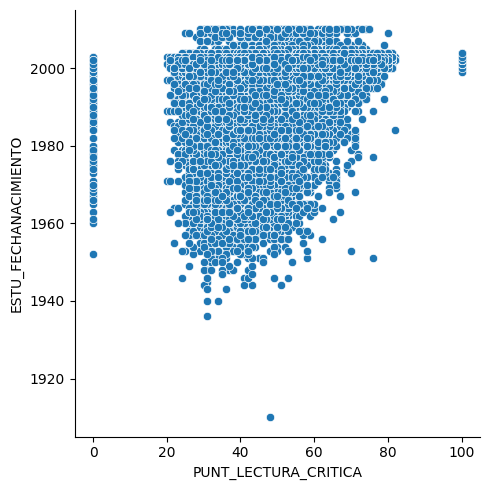

In [193]:
sns.relplot(data=df, x="PUNT_LECTURA_CRITICA",  y="ESTU_FECHANACIMIENTO")